In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_abstract = pd.read_csv('Data/Update/Abstractz.csv').iloc[:,:3:2]
df_abstract

,No.,Abstracts
0,1,Inland water bodies (particularly ponds) emit ...
1,2,Electric vehicles (EVs) can reduce transportat...
2,3,Greenhouse gas (GHG) emissions from soil carbo...
3,4,The increasing greenhouse gas (GHG) emission a...
4,5,Energy efficiency has enormous potential for b...
5,6,Unprecedented urbanization is dramatically alt...
6,7,As China urbanized and its economy grew rapidl...
7,8,Given the importance of the environment around...
8,9,Organic amendment often affects both crop yiel...
9,10,Growing population and limited energy resource...


In [11]:
df_factor = pd.read_csv('Data/Update/GHG_IndoFactors2.csv')

df_factor.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Indonesia,IDN,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,7.688820e+05,8.298896e+05,8.342565e+05,7.991003e+05,8.442967e+05,8.495131e+05,8.475823e+05,8.935883e+05,9.580761e+05,1.002369e+06
1,Indonesia,IDN,"Internally displaced persons, new displacement...",VC.IDP.NWCV,3.500000e+04,1.500000e+04,5.000000e+03,3.000000e+03,8.000000e+02,1.500000e+02,3.500000e+02,2.800000e+03,4.500000e+03,2.300000e+04
2,Indonesia,IDN,"Voice and Accountability: Percentile Rank, Low...",VA.PER.RNK.LOWER,3.886256e+01,4.131455e+01,4.413145e+01,4.319249e+01,4.679803e+01,4.630542e+01,4.482759e+01,4.285714e+01,4.299517e+01,4.299517e+01
3,Indonesia,IDN,Travel services (% of commercial service exports),TX.VAL.TRVL.ZS.WT,4.317551e+01,3.751527e+01,3.608053e+01,4.083123e+01,4.477008e+01,4.984451e+01,4.948332e+01,5.327123e+01,5.387354e+01,5.470876e+01
4,Indonesia,IDN,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,1.611540e+10,2.131572e+10,2.306956e+10,2.233384e+10,2.291958e+10,2.158904e+10,2.264534e+10,2.466505e+10,3.048954e+10,3.091049e+10


In [12]:
df_indicators = df_factor['Indicator Name']

df_indicators

0      Total greenhouse gas emissions (kt of CO2 equi...
1      Internally displaced persons, new displacement...
2      Voice and Accountability: Percentile Rank, Low...
3      Travel services (% of commercial service exports)
4               Commercial service exports (current US$)
                             ...                        
890              Food production index (2014-2016 = 100)
891                  Permanent cropland (% of land area)
892                               Arable land (hectares)
893    Fertilizer consumption (% of fertilizer produc...
894             Observed Average Annual Mean-Temperature
Name: Indicator Name, Length: 895, dtype: object

In [13]:
import pandas as pd
import spacy

nlp = spacy.load('en_core_web_sm')

def extract_keywords(sentence):
    doc = nlp(sentence)
    keywords = [token.text.lower() for token in doc if not token.is_stop and token.is_alpha]
    return keywords

df = df_abstract  
df2 = df_factor

keywords_array = []
keywords_array2 = []

for _, row in df.iterrows():
    sentence = row['Abstracts']
    keywords = extract_keywords(sentence)
    keywords_array.extend(keywords)

for _, rows in df2.iterrows():
    sentence2 = rows['Indicator Name']
    keywords2 = extract_keywords(sentence2)
    keywords_array2.extend(keywords2)

keywords_list = pd.DataFrame(list(set(keywords_array)))
indicators_list = pd.DataFrame(list(set(keywords_array2)))

display(keywords_list)
display(indicators_list)

,0
0,standard
1,characteristics
2,type
3,run
4,resources
...,...
1072,current
1073,oxide
1074,emitters
1075,altered


,0
0,central
1,standard
2,mm
3,particulate
4,resources
...,...
623,technologies
624,current
625,voice
626,materials


In [14]:
intersection_values = pd.Series(list(set(keywords_list[0]).intersection(indicators_list[0])))
intersection_str = ', '.join(map(str, intersection_values))

# Write the intersection values to a text file
with open('keyword.txt', 'w') as file:
    file.write(intersection_str)
# Print the intersection values
# print(str(intersection_values))

In [15]:
set(keywords_list[0])

{'standard',
 'characteristics',
 'type',
 'run',
 'resources',
 'paper',
 'improved',
 'structure',
 'parameters',
 'dioxide',
 'shall',
 'remarkably',
 'cold',
 'forms',
 'crucial',
 'nuclear',
 'rise',
 'exhibit',
 'asia',
 'flow',
 'throughput',
 'fees',
 'strong',
 'scenario',
 'technology',
 'emitted',
 'influencing',
 'stability',
 'impacts',
 'toc',
 'treatment',
 'micro',
 'etc',
 'catreg',
 'need',
 'control',
 'st',
 'linkages',
 'domains',
 'overall',
 'time',
 'altering',
 'policy',
 'knowledge',
 'influenced',
 'correction',
 'extended',
 'doc',
 'dependence',
 'net',
 'lower',
 'identifies',
 'revealed',
 'biochar',
 'combustion',
 'suggesting',
 'cropping',
 'behavior',
 'choice',
 'endowments',
 'calibrate',
 'bacteria',
 'diets',
 'agriculture',
 'natural',
 'result',
 'soybean',
 'industries',
 'waste',
 'aim',
 'capita',
 'increasing',
 'emission',
 'microbial',
 'simulation',
 'markov',
 'considered',
 'robust',
 'education',
 'interaction',
 'factors',
 'important

# New Update

## Abstract Data

In [16]:
import pandas as pd
import spacy
from collections import Counter

df_abstract = pd.read_csv('Data/Update/Abstractz.csv').iloc[:,:3:2]
nlp = spacy.load('en_core_web_sm')

def extract_keywords(sentence):
    doc = nlp(sentence)
    keywords = [str(token.text.lower()) for token in doc if not token.is_stop and token.is_alpha and token.lemma_ and len(token)>1]
    return keywords

df = df_abstract  

keywords = []

for _, row in df.iterrows():
    sentence = row['Abstracts']
    keyword = extract_keywords(sentence)
    keywords.extend(keyword)

keywords_list = pd.DataFrame(list(set(keywords)))
keywords_list.to_csv('abstracts.txt', sep=',', index=False, header=False)

display(keywords_list)
print(Counter(keywords).most_common(15))

,0
0,standard
1,characteristics
2,type
3,run
4,resources
...,...
1065,current
1066,oxide
1067,emitters
1068,altered


[('emissions', 98), ('ghg', 73), ('energy', 50), ('greenhouse', 33), ('gas', 29), ('soil', 26), ('economic', 24), ('carbon', 21), ('increase', 20), ('emission', 18), ('factors', 18), ('study', 18), ('production', 17), ('use', 17), ('china', 17)]


## Dataset Factors

In [17]:
df_ghg = pd.read_csv('Data/Update/GHG_IndoFactors2.csv')
nlp = spacy.load('en_core_web_sm')

def extract_keywords(sentence):
    doc = nlp(sentence)
    keywords = [str(token.text.lower()) for token in doc if not token.is_stop and token.is_alpha and token.lemma_ and len(token)>1]
    return keywords

df2 = df_ghg  

keywords2 = []

for _, row in df2.iterrows():
    sentence = row['Indicator Name']
    keyword = extract_keywords(sentence)
    keywords2.extend(keyword)

keywords_list2 = pd.DataFrame(list(set(keywords2)))
keywords_list2.to_csv('datasetFactors.txt', sep=',', index=False, header=False)

display(keywords_list2)
print(Counter(keywords2).most_common(7))

,0
0,central
1,standard
2,mm
3,particulate
4,resources
...,...
623,technologies
624,current
625,voice
626,materials


[('current', 233), ('population', 193), ('total', 129), ('female', 113), ('male', 112), ('ages', 109), ('net', 95)]


## Intersection

In [18]:
list1 = keywords
list2 = keywords2

# Convert lists to sets
set1 = set(list1)
set2 = set(list2)

# Find the intersection
intersection = set1.intersection(set2)

# Convert the intersection back to a list
intersection_list = list(intersection)
intersection_lists = pd.DataFrame(list(set(intersection))).sort_values(0)
output3 = ', '.join(intersection_lists.to_numpy().flatten())

with open('intersects.txt', 'w') as file:
    file.write(output3)

# Print the intersection
print(sorted(intersection_list), '\nLength:', len(intersection_list))

['abroad', 'account', 'agencies', 'agricultural', 'agriculture', 'air', 'alternative', 'area', 'asia', 'assessment', 'available', 'average', 'budget', 'capacity', 'capita', 'carbon', 'carried', 'case', 'caused', 'change', 'changes', 'clean', 'construction', 'consumer', 'consumption', 'contributions', 'control', 'conversion', 'country', 'credit', 'crop', 'current', 'data', 'day', 'depth', 'development', 'dioxide', 'direct', 'economies', 'economy', 'education', 'electric', 'electricity', 'emission', 'emissions', 'energy', 'equivalent', 'estimate', 'etc', 'exchange', 'exports', 'extent', 'factor', 'fertility', 'fertilizer', 'food', 'forms', 'freshwater', 'fuel', 'gains', 'gap', 'gas', 'gdp', 'general', 'global', 'government', 'greenhouse', 'growth', 'health', 'high', 'highest', 'households', 'imports', 'including', 'income', 'index', 'indicators', 'industry', 'intensity', 'internal', 'international', 'investment', 'kg', 'korea', 'land', 'largest', 'law', 'level', 'life', 'linked', 'livest

In [19]:
abstract_count = Counter(keywords)

result_dict = {key: abstract_count[key] for key in intersection_list if key in abstract_count}
sorted_result = dict(sorted(result_dict.items(), key=lambda item: (item[1], item[0])))

print(sorted_result)

{'abroad': 1, 'account': 1, 'agencies': 1, 'air': 1, 'alternative': 1, 'asia': 1, 'assessment': 1, 'average': 1, 'budget': 1, 'capita': 1, 'carried': 1, 'case': 1, 'construction': 1, 'consumer': 1, 'contributions': 1, 'day': 1, 'depth': 1, 'direct': 1, 'equivalent': 1, 'etc': 1, 'exchange': 1, 'exports': 1, 'fertility': 1, 'forms': 1, 'freshwater': 1, 'gains': 1, 'gap': 1, 'gdp': 1, 'general': 1, 'government': 1, 'internal': 1, 'largest': 1, 'law': 1, 'linked': 1, 'mean': 1, 'net': 1, 'non': 1, 'number': 1, 'oil': 1, 'old': 1, 'original': 1, 'overall': 1, 'power': 1, 'productivity': 1, 'property': 1, 'rail': 1, 'received': 1, 'road': 1, 'scale': 1, 'series': 1, 'south': 1, 'stability': 1, 'sub': 1, 'switzerland': 1, 'technical': 1, 'technologies': 1, 'technology': 1, 'terms': 1, 'trade': 1, 'unit': 1, 'value': 1, 'varies': 1, 'year': 1, 'years': 1, 'young': 1, 'available': 2, 'credit': 2, 'current': 2, 'electric': 2, 'extent': 2, 'households': 2, 'imports': 2, 'income': 2, 'index': 2, 

# Visualize

In [20]:
0.05*len(sorted_result)

8.4

In [21]:
import math
threshold = math.floor(0.05*len(sorted_result))

# Use dictionary comprehension to filter the data
selected_keywords = {key: value for key, value in sorted_result.items() if value >= threshold}
print(selected_keywords)
print(len(selected_keywords))

{'global': 8, 'high': 9, 'long': 9, 'related': 9, 'total': 9, 'urban': 9, 'population': 10, 'yield': 10, 'intensity': 11, 'land': 11, 'consumption': 12, 'growth': 12, 'food': 13, 'production': 17, 'use': 17, 'emission': 18, 'carbon': 21, 'gas': 29, 'greenhouse': 33, 'energy': 50, 'emissions': 98}
21


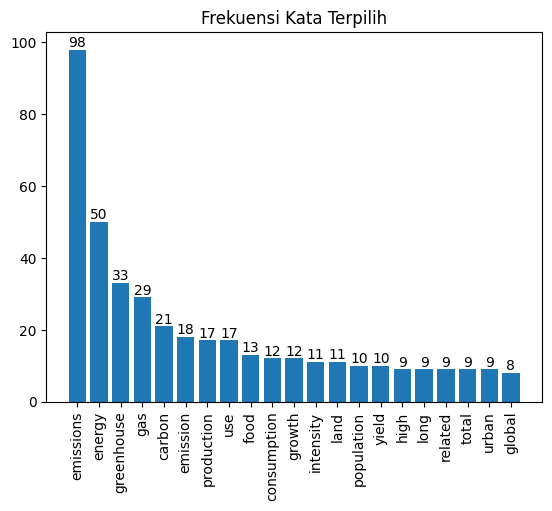

In [23]:
data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

# Extract labels and values from the sorted dictionary
labels = list(data.keys())
values = list(data.values())

# Create a bar chart
plt.bar(labels, values)

# Add labels to the bars
for i in range(len(labels)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom')

plt.xticks(rotation='vertical')
# Add a title to the chart
plt.title('Frekuensi Kata Terpilih')

# Show the chart
plt.show()

In [24]:
# List of keys to be deleted
keys_to_delete = ['use', 'yield', 'high', 'long', 'related', 'total', 'greenhouse', 'emissions', 'emission']

# Delete elements with the specified keys
for key in keys_to_delete:
    del data[key]

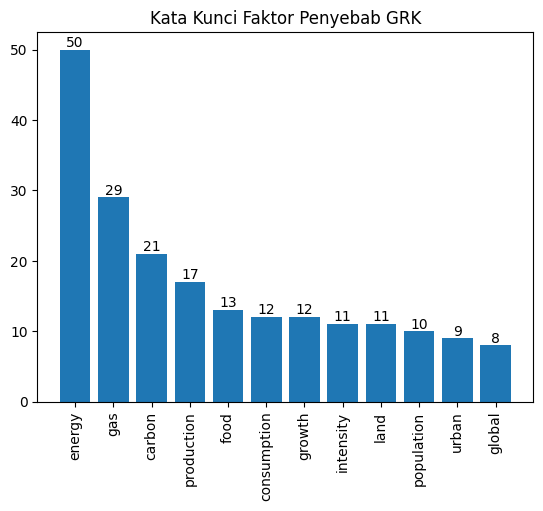

In [25]:
data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

# Extract labels and values from the sorted dictionary
labels = list(data.keys())
values = list(data.values())

# Create a bar chart
plt.bar(labels, values)

# Add labels to the bars
for i in range(len(labels)):
    plt.text(i, values[i], str(values[i]), ha='center', va='bottom')

plt.xticks(rotation='vertical')
# Add a title to the chart
plt.title('Kata Kunci Faktor Penyebab GRK')

# Show the chart
plt.show()

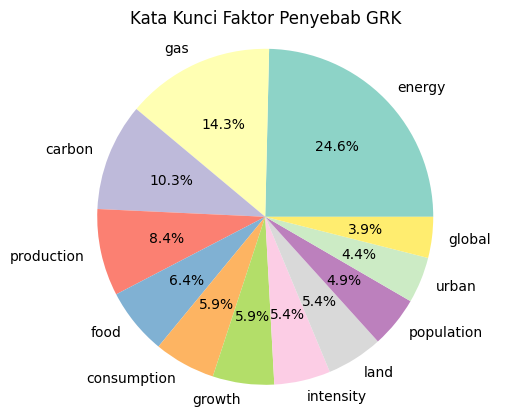

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = {k: v for k, v in sorted(data.items(), key=lambda item: item[1], reverse=True)}

labels = list(data.keys())
values = list(data.values())
cmap = plt.get_cmap('Set3')

plt.pie(values, labels=labels, colors=cmap.colors, autopct='%1.1f%%')
plt.axis('equal')

plt.title('Kata Kunci Faktor Penyebab GRK')

plt.show()

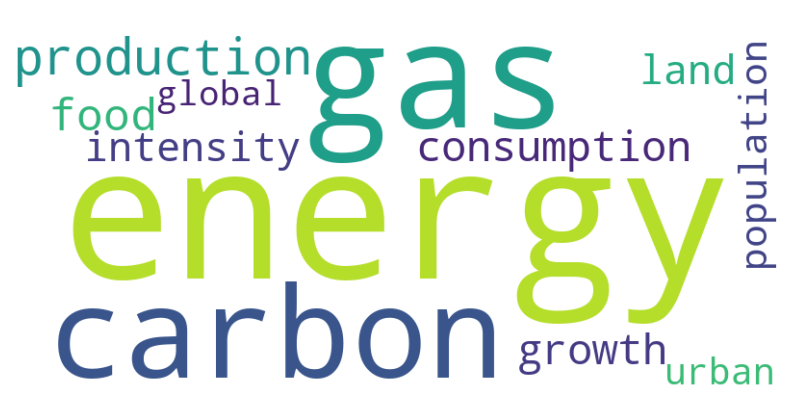

In [27]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(data)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Sample list of words
word_list = ['energy', 'gas', 'carbon', 'production', 'food', 'consumption', 'growth', 'intensity', 'land', 'population', 'urban', 'global']

# Create a Dictionary from the word list
dictionary = Dictionary([word_list])

# Convert the word list to a bag-of-words (BoW) representation
bow_corpus = [dictionary.doc2bow(word_list)]

# Train the LDA model
num_topics = 3  # Number of desired topics/themes
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the identified topics and their word distributions
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Topic 0: 0.083*"intensity" + 0.083*"growth" + 0.083*"gas" + 0.083*"consumption" + 0.083*"energy" + 0.083*"land" + 0.083*"global" + 0.083*"population" + 0.083*"food" + 0.083*"urban"
Topic 1: 0.083*"intensity" + 0.083*"growth" + 0.083*"global" + 0.083*"consumption" + 0.083*"carbon" + 0.083*"food" + 0.083*"gas" + 0.083*"land" + 0.083*"production" + 0.083*"energy"
Topic 2: 0.083*"urban" + 0.083*"population" + 0.083*"energy" + 0.083*"production" + 0.083*"land" + 0.083*"gas" + 0.083*"food" + 0.083*"carbon" + 0.083*"consumption" + 0.083*"global"
